In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df.head()

### Find the number of NULL values in each column

In [ ]:
print(df.isna().sum())
df.isna().sum().plot.barh()

In [ ]:
df.describe()

In [ ]:
df.info()

## PRE PROCESSING

In [ ]:
df = df.drop(['id'],axis=1)

### Gender analysis

In [ ]:
df['gender'].value_counts()

In [ ]:
df['gender'] = df['gender'].replace('Other','Female')
df['gender'].value_counts().plot(kind="pie")

## Target feature - Stroke

### Stroke analysis

In [ ]:
df['stroke'].value_counts()

In [ ]:
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [ ]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

### Hyper-tension Analysis

In [ ]:
df['hypertension'].value_counts().plot(kind="bar",color = "red")

### Work type Analysis

In [ ]:
df['work_type'].value_counts()

In [ ]:
df['work_type'].value_counts().plot(kind="pie")

### Smoking status Analysis

In [ ]:
df['smoking_status'].value_counts()

In [ ]:
df['smoking_status'].value_counts().plot(kind="pie")

### Residence type Analysis

In [ ]:
df['Residence_type'].value_counts()

In [ ]:
df['Residence_type'].value_counts().plot(kind="pie")

### BMI analysis

In [ ]:
df['bmi'].isnull().sum()

In [ ]:
sns.histplot(data=df['bmi'])

In [ ]:
sns.boxplot(data=df['bmi'])

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

In [ ]:
df['bmi'].isna().sum()/len(df['bmi'])*100

In [ ]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

In [ ]:
df['stroke'].sum()/len(df)*100

In [ ]:
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

In [ ]:
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

### AGE analysis

In [ ]:
sns.histplot(data=df['age'])

In [ ]:
sns.boxplot(data=df['age'])

### AVERAGE GLUCOSE LEVEL ANALYSIS

In [ ]:
sns.histplot(data=df['avg_glucose_level'])

In [ ]:
sns.boxplot(data=df['avg_glucose_level'])

In [ ]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

In [ ]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

### Heart_disease analysis

In [ ]:
df['heart_disease'].value_counts()

In [ ]:
df['heart_disease'].value_counts().plot(kind="pie")

### Ever_married analysis with Values

In [ ]:
df['ever_married'].value_counts()

In [ ]:
df['ever_married'].value_counts().plot(kind="pie")

## Cross analysis - all the attribute compared with target attibute

In [ ]:
sns.countplot(x='stroke', hue='gender', data=df)

In [ ]:
sns.countplot(x='stroke', hue='work_type', data=df)

In [ ]:
sns.countplot(x='stroke', hue='smoking_status', data=df)

In [ ]:
sns.countplot(x='stroke', hue='Residence_type', data=df)

In [ ]:
sns.countplot(x='stroke', hue='heart_disease', data=df)

In [ ]:
sns.countplot(x='stroke', hue='ever_married', data=df)

### Creating dummy variables for numeric-binary attributes

In [ ]:
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
df = pd.get_dummies(df, drop_first= True)

In [ ]:
df.head()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

### Creating test-train split (80-20 split)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

## Training Model

### Decision Tree

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
DT_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",DT_accuracy)

In [ ]:
print(classification_report(y_test, y_pred))

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

confusion_matrix(y_test, y_pred_knn)
KNN_accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy:',KNN_accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

In [ ]:
print(classification_report(y_test, y_pred_knn))

### XGBoost

In [ ]:
from xgboost  import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
XG_accuracy  = accuracy_score(y_test, y_pred_xgb)
print('Accuracy:',XG_accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_xgb)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

In [ ]:
print(classification_report(y_test, y_pred_xgb))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:',RF_accuracy)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold

kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X_over, y_over, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  99.3622877954386
[0.98973306 0.99589322 0.99382716 0.99176955 0.99588477 1.
 1.         1.         0.99382716 0.99176955 0.99382716 0.99176955
 0.98765432 0.99382716 0.98971193 0.99176955 0.99176955 0.99794239
 0.98353909 0.99794239]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[963,  12],
       [  0, 970]])

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       975
           1       0.99      1.00      0.99       970

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
LR_accuracy = accuracy_score(y_test, y_pred_lr)
print('Accuracy:', LR_accuracy)

Accuracy: 0.7763496143958869


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       975
           1       0.75      0.82      0.79       970

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



### SVM

In [ ]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
SVM_accuracy = accuracy_score(y_test,y_pred_sv)

print(SVM_accuracy)

0.7444730077120822


In [ ]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       975
           1       0.73      0.78      0.75       970

    accuracy                           0.74      1945
   macro avg       0.75      0.74      0.74      1945
weighted avg       0.75      0.74      0.74      1945



### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred_adb=adb.predict(X_test)
ADa_accuracy = accuracy_score(y_test,y_pred_adb)
print(ADa_accuracy)

0.7902313624678663


In [ ]:
print(classification_report(y_test,y_pred_adb))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       975
           1       0.76      0.85      0.80       970

    accuracy                           0.79      1945
   macro avg       0.79      0.79      0.79      1945
weighted avg       0.80      0.79      0.79      1945



### CatBoost

In [ ]:
!pip install catboost
import catboost as ctb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.9 MB/s eta 0:00:00


In [ ]:
g t;lk,szzmodel_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)
CB_accuracy = accuracy_score(expected_y,predicted_y)
print(CB_accuracy)

Learning rate set to 0.024735
0:	learn: 0.6777135	total: 50.7ms	remaining: 50.7s
1:	learn: 0.6650048	total: 53.9ms	remaining: 26.9s
2:	learn: 0.6517112	total: 56.9ms	remaining: 18.9s
3:	learn: 0.6377224	total: 62.1ms	remaining: 15.5s
4:	learn: 0.6254543	total: 65.7ms	remaining: 13.1s
5:	learn: 0.6137638	total: 70.4ms	remaining: 11.7s
6:	learn: 0.6050191	total: 75.9ms	remaining: 10.8s
7:	learn: 0.5964738	total: 81.5ms	remaining: 10.1s
8:	learn: 0.5880312	total: 86.6ms	remaining: 9.53s
9:	learn: 0.5794442	total: 89.7ms	remaining: 8.88s
10:	learn: 0.5720313	total: 93.1ms	remaining: 8.37s
11:	learn: 0.5643628	total: 96.5ms	remaining: 7.95s
12:	learn: 0.5552489	total: 102ms	remaining: 7.77s
13:	learn: 0.5489984	total: 108ms	remaining: 7.62s
14:	learn: 0.5417293	total: 113ms	remaining: 7.43s
15:	learn: 0.5372127	total: 116ms	remaining: 7.16s
16:	learn: 0.5305872	total: 120ms	remaining: 6.94s
17:	learn: 0.5252405	total: 124ms	remaining: 6.74s
18:	learn: 0.5213464	total: 127ms	remaining: 6.56s

In [ ]:
print(classification_report(expected_y,predicted_y))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       975
           1       0.93      1.00      0.97       970

    accuracy                           0.96      1945
   macro avg       0.97      0.96      0.96      1945
weighted avg       0.97      0.96      0.96      1945



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

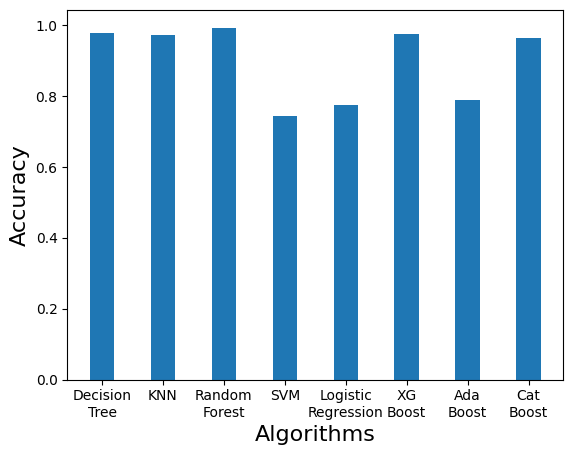

In [ ]:
x = np.array(["Decision\nTree","KNN","Random\nForest","SVM","Logistic\nRegression","XG\nBoost","Ada\nBoost","Cat\nBoost"])
y = np.array([DT_accuracy,KNN_accuracy,RF_accuracy,SVM_accuracy,LR_accuracy,XG_accuracy,ADa_accuracy,CB_accuracy])
plt.xlabel("Algorithms",fontsize = 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.bar(x,y,width = 0.4)
plt.show()

In [ ]:
age=75
avg_glucose_level=300
bmi=36.6
gender_Male=1
ever_married_Yes=1
work_type_Never_worked=0
work_type_Private=1
work_type_Self_employed=0
work_type_children=0
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=1
heart_disease_1=1
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)


1


In [ ]:
age=45
avg_glucose_level=234
bmi=45.6
gender_Male=0
ever_married_Yes=1
work_type_Never_worked=0
work_type_Private=1
work_type_Self_employed=1
work_type_children=0
Residence_type_Urban=1
smoking_status_formerly_smoked=0
smoking_status_never_smoked=0
smoking_status_smokes=1
hypertension_1=1
heart_disease_1=0
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)


0
